StellarMasses : 197681
visualMorph : 38795
visualMorphElliptical : 3053
visualMorphSpiral : 3053
EnvMeasures : 67996


uminusr Gamma fit : 15.9238400811153 -0.09535837402883998 0.09603836903944837
uminusr LogNorm fit 0.21391822420256174 -0.35663995999232057 1.7496690179212857
uminusr Normal fit : 1.4337514638900757 0.39080873131752014
uminusr Johnson fit : -1.7309177551056694 2.0581956044245477 0.8822492742396667 0.5208044355286388
Count [  2   3   1   2   7   2  12   2  10  10  15  43  47  72 110 149 217 307
 380 535 676 788 916 975 926 943 842 793 664 576 533 509 454 400 401 324
 343 307 292 229 235 238 195 186 163 150 118 127 100  86  66  49  22  14
   3   2   3   1   2   1   3   2   3   0   2   0   4   0   0   1   2   2
   0   2   0   0   0   1   0   1]
Bins [0.11694176 0.16315806 0.20937437 0.25559068 0.301807   0.3480233
 0.39423957 0.44045588 0.4866722  0.53288853 0.5791048  0.6253211
 0.6715374  0.7177537  0.76397    0.8101863  0.85640264 0.90261894
 0.94883525 0.99505156 1.0412679  1.0874841  1.1337005  1.1799167
 1.2261331  1.2723494  1.3185657  1.364782   1.4109983  1.4572146
 1.503431   1.5

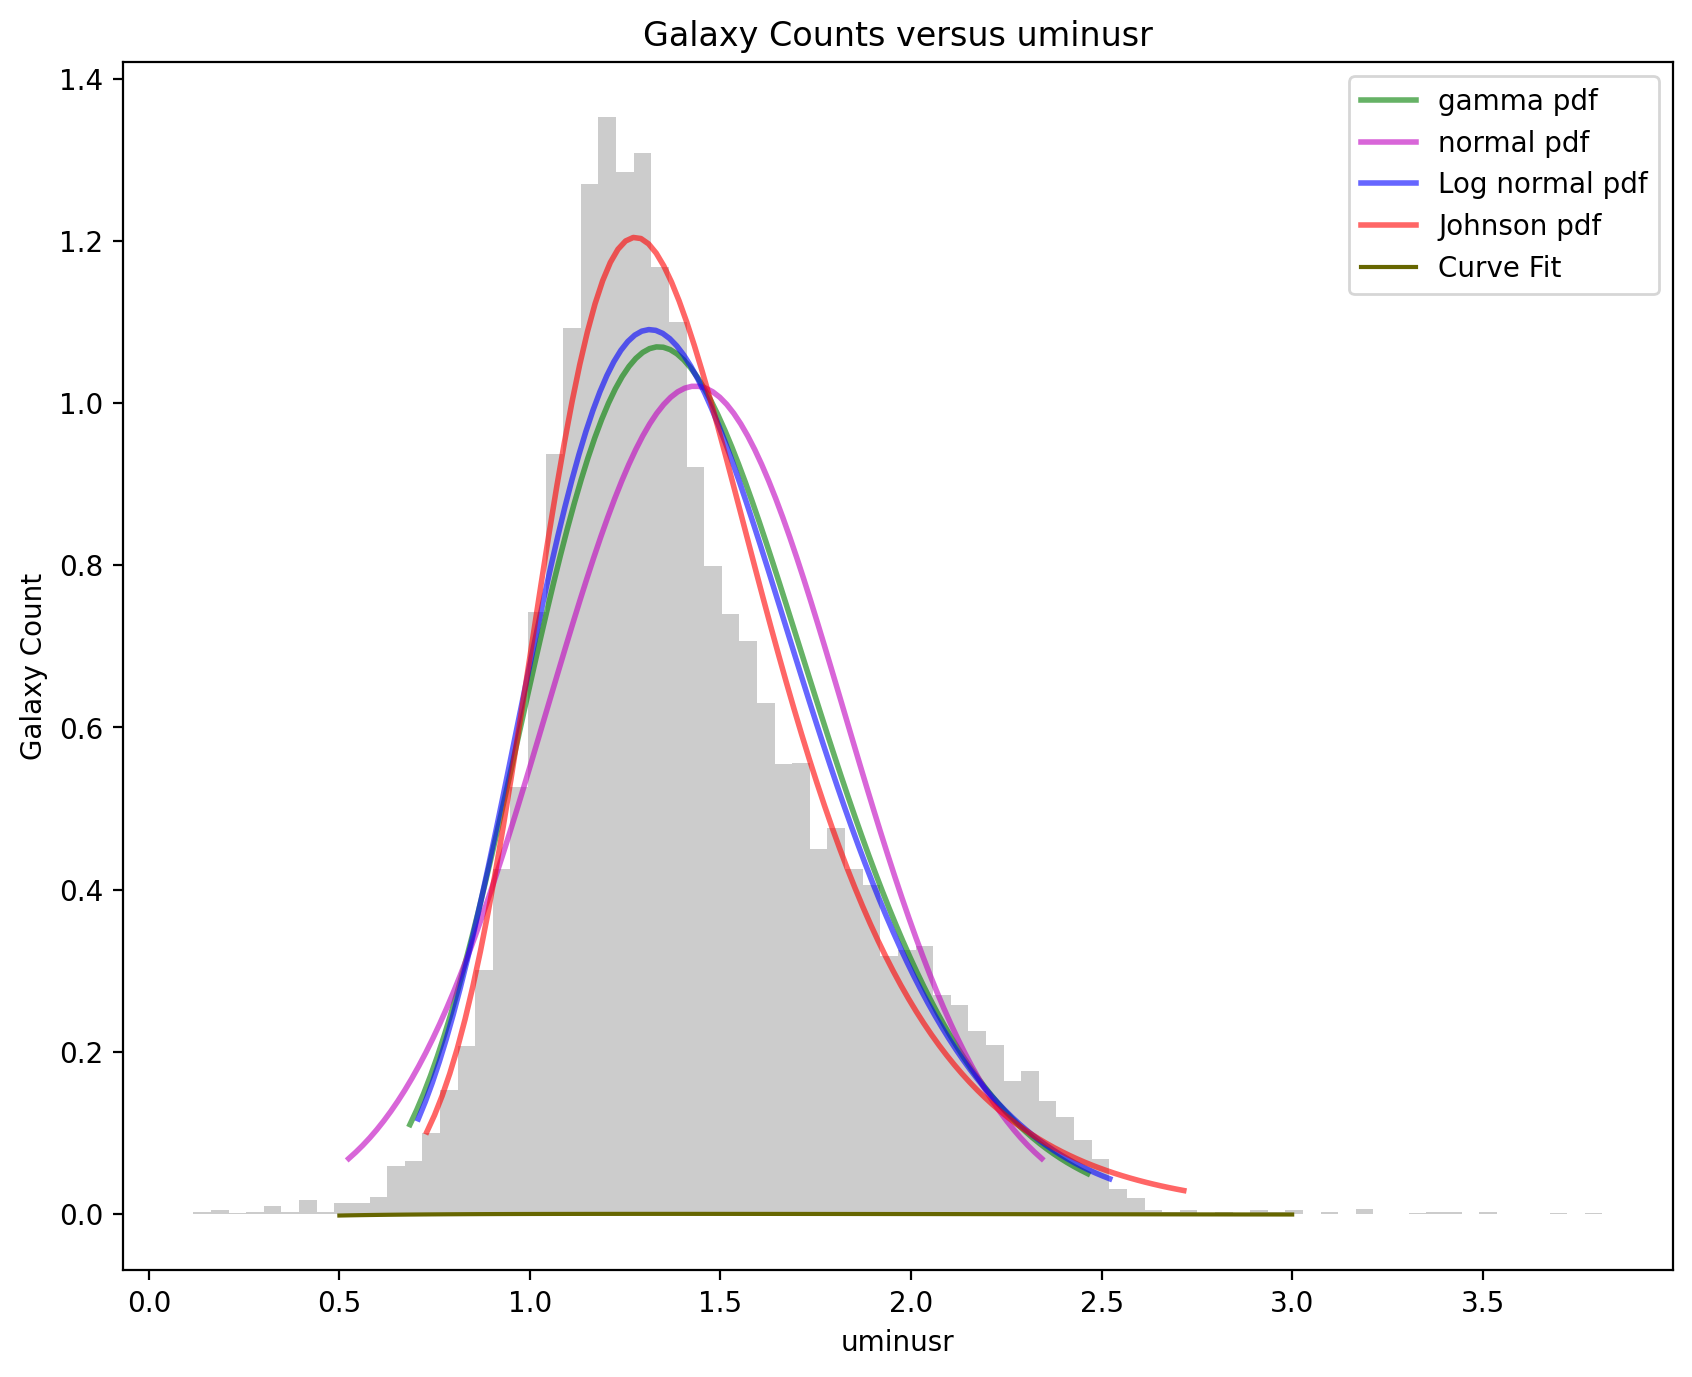

logmstar Gamma Fit 1185.572582987105, -15.721167665989253, 0.021164300273248338
logmstar LogNorm fit 0.006347433813056008 -104.86923751975277 114.22746533089628
logmstar Normal Fit 9.362042427062988, 0.7257364392280579
logmstar Johnson Fit 0.5257427010179752, 6.9399773548136245,9.742905818224742,4.969157936606156
Counts [   9   22  174 1039 4015 5600 3215 1455   65    7]
Bins [ 5.725189   6.389815   7.0544405  7.7190666  8.383692   9.048318
  9.712944  10.377569  11.042195  11.7068205 12.371447 ]
[6.057501792907715, 6.722127914428711, 7.386753559112549, 8.051379203796387, 8.716005325317383, 9.380630493164062, 10.045256614685059, 10.709882736206055, 11.374507904052734, 12.039133071899414]
popt [ 94.         -23.5565102   -0.94895478]
pcov [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


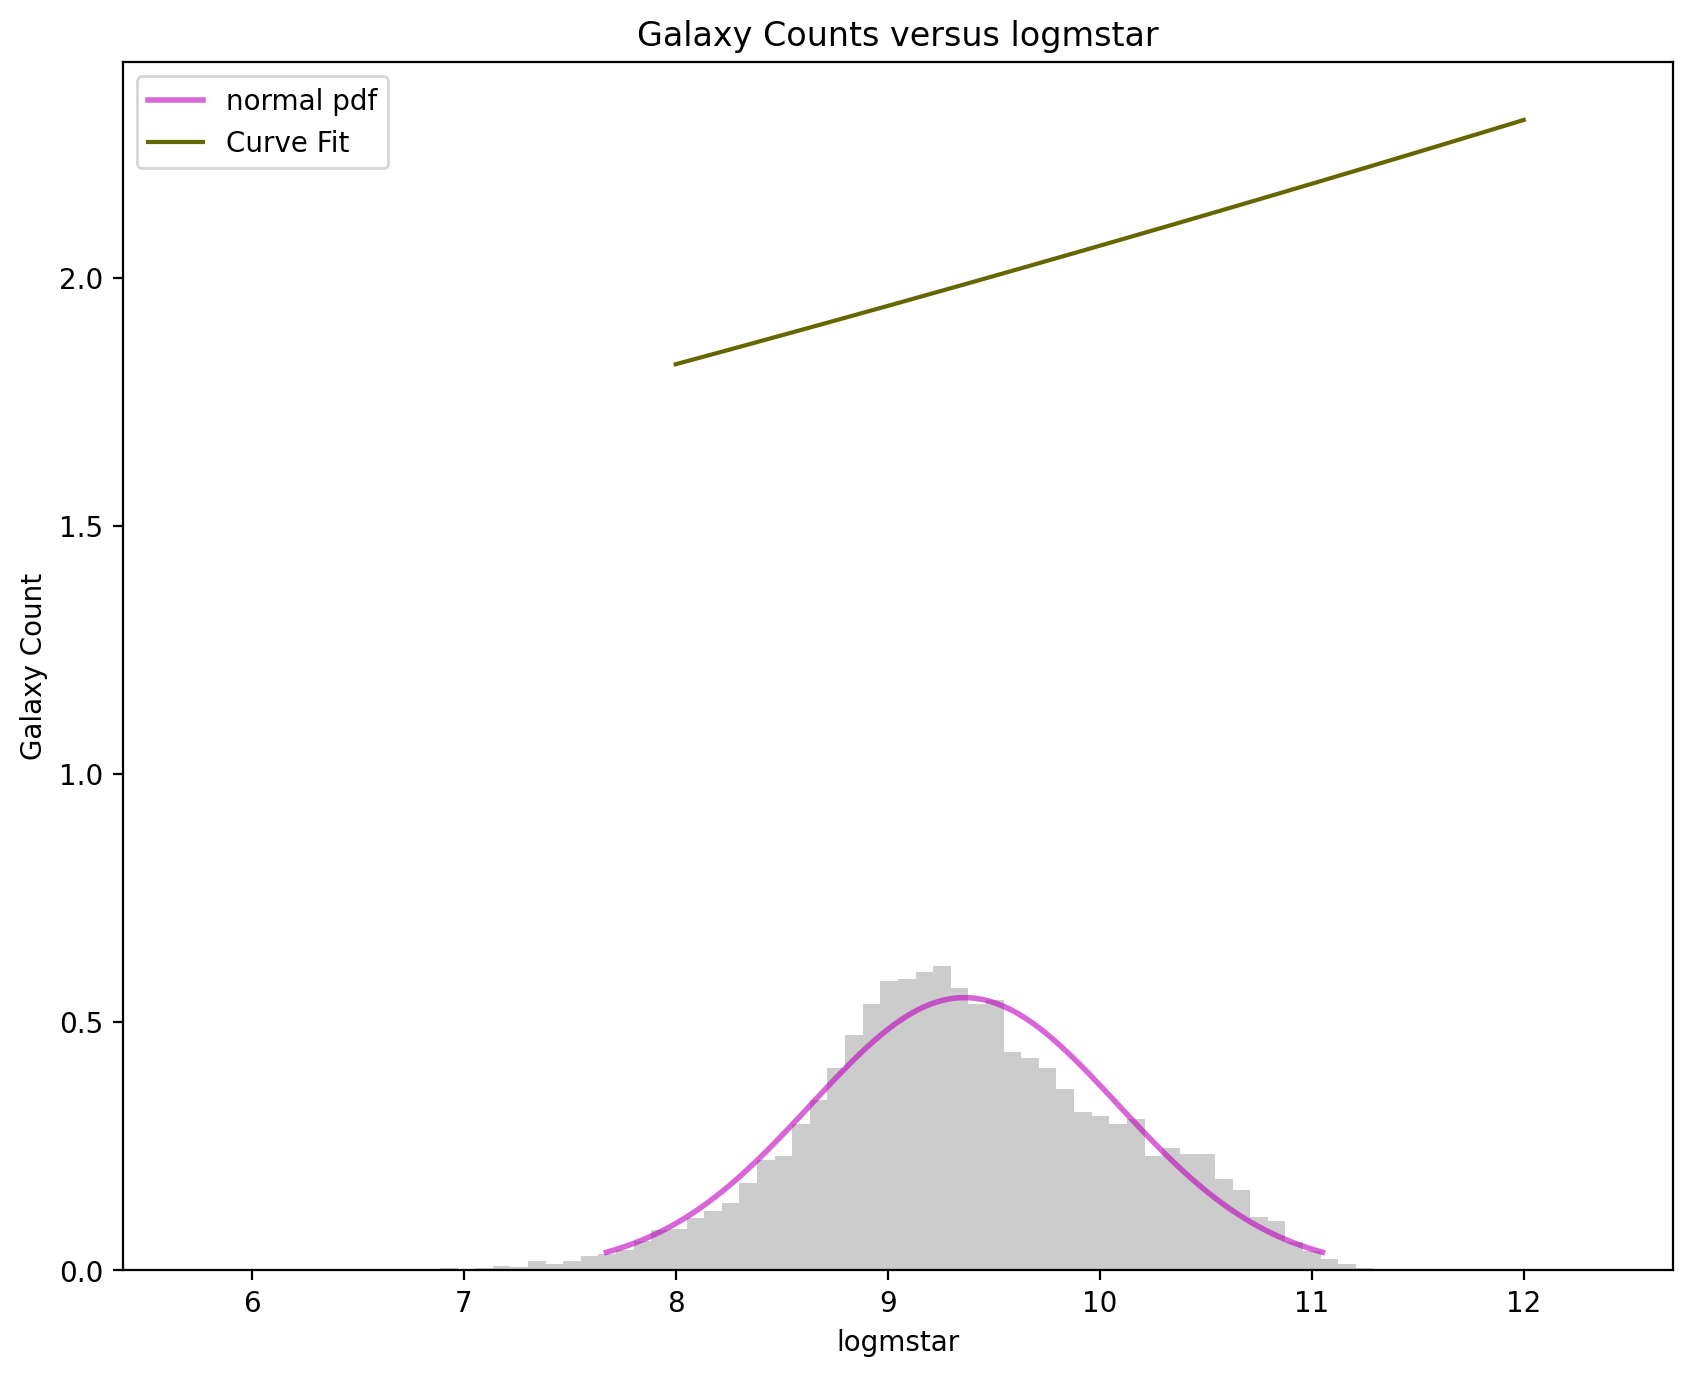

In [30]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import pandas as pd

#print(RawMassEClassEmeasure.colnames)
StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data

#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.1]
StellarMasses = StellarMasses[StellarMasses['uminusr'] < 4]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
print(f"StellarMasses : {len(StellarMasses)}")#print(RawMassEClassEmeasure.colnames)

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
## Clean Data
visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]
print(f"visualMorphElliptical : {len(visualMorphElliptical)}")
print(f"visualMorphSpiral : {len(visualMorphElliptical)}")

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 15]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
envMeasures = envMeasures[envMeasures['DistanceTo5nn'] > 0.1]
envMeasures = envMeasures[envMeasures['CountInCyl'] > 0]

RErange = join(visualMorphSpiral,StellarMasses,keys='CATAID',join_type='inner')

binCount = 80
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(10, 8), dpi=200)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax1 = fig.add_subplot(1, 1, 1)
ax1.title.set_text('Galaxy Counts versus uminusr')
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

ag, bg, cg =stats.gamma.fit(RErange[xfield].data)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

#print(stats.lognorm.fit(RErange[xfield].data))
aln, bln, cln = stats.lognorm.fit(RErange[xfield].data)
print(f"{xfield} LogNorm fit {aln} {bln} {cln}")
xl0,xl1 = stats.lognorm.ppf([0.01, 0.99], aln, loc=bln, scale = cln)
xl = np.linspace(xl0,xl1,100)

an, bn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, bn)
xn = np.linspace(xn0,xn1,100)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
#transdata, lamda = stats.boxcox(RErange[xfield])
#print(f"{xfield} BoxCox lamda {lamda}")
#acn ,bcn =stats.norm.fit(transdata)
#print(f"{xfield} Normal fit : {acn} {bcn}")
#xcn0, xcn1 = stats.norm.ppf([0.01, 0.99], acn, scale = bcn)
#xcn = np.linspace(xcn0,xcn1,100)
# y values for CoxBox
#ycn = (lamda / xcn**lamda-1)


aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'m-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xl, stats.lognorm.pdf(xl, aln, loc=bln, scale=cln),'b-', lw=2, alpha=0.6, label='Log normal pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True,color="#CCCCCC")
#ax1.set_xlabel(xfield)
#plt.show()
#plt.savefig('../../ChartsPlots/DistributionsCounts-minusr.png')

counts, bins = np.histogram(RErange[xfield],bins = binCount )
print(f'Count {counts}')
print(f'Bins {bins}')
print(f'Len Counts {len(counts)}')
x = []
for i in range(len(counts)) :
    x.append((bins[i]+bins[i+1])/2)

print(f'Centers {x}')
print(len(x))

from scipy.optimize import curve_fit
import math

def norm(y,b,c) :
    c1 = (1.0/math.sqrt(2* math.pi))
    e1 = -((y-b)**2/(2*c**2))
    return(c1*e1)

def func(y, a, b, c):
    c1 = (1.0/math.sqrt(2* math.pi))
    c2 = a*y**(a-1)
    e1 = -((y**a - b)**2/(2*c**2))
    return(c1*c2*e1)
    #return (1.0/math.sqrt(2* math.pi) * a*y^(a-1)* np.exp(-(y^a - c)^2/2*b^2))

#popt, pcov = curve_fit(func,x,counts,p0=[-1,an,bn])
popt, pcov = curve_fit(func,x,counts)
#popt, pcov = curve_fit(norm,x,counts,p0=[an,bn])

print(popt)
print(pcov)

def funcY(y) :
    #return norm(y,*popt)/1000
    return func(y,*popt)

cfn = np.linspace(0.5,3,100)

ax1.plot(cfn,funcY(cfn),color="#666600", label = 'Curve Fit')
ax1.legend()
plt.show()


fig = plt.figure(figsize=(10, 8), dpi=200)
xfield ='logmstar'
ax2 = fig.add_subplot(1, 1, 1)
ax2.title.set_text('Galaxy Counts versus logmstar')
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

alg, blg, clg =stats.gamma.fit(RErange[xfield].data)
print(f"{xfield} Gamma Fit {alg}, {blg}, {clg}")
xlg0, xlg1 = stats.gamma.ppf([0.01, 0.99], alg, loc = blg, scale=clg)
xlg = np.linspace(xlg0,xlg1,100)

aln, bln, cln = stats.lognorm.fit(RErange[xfield].data)
print(f"{xfield} LogNorm fit {aln} {bln} {cln}")
xln0, xln1 = stats.lognorm.ppf([0.01, 0.99], aln, loc = bln, scale=cln)
xln = np.linspace(xln0,xln1,100)

an, bn =stats.norm.fit(RErange[xfield].data)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

alj, blj, clj, dlj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson Fit {alj}, {blj},{clj},{dlj}")
xlj0, xlj1 = stats.johnsonsu.ppf([0.01, 0.99], alj, blj, loc=clj, scale=dlj)
xlj = np.linspace(xlj0,xlj1,100)

#ax2.plot(xlg, stats.gamma.pdf(xlg, alg, loc=blg, scale=clg),'g-', lw=2, alpha=0.6, label='gamma pdf')
#ax2.plot(xln, stats.lognorm.pdf(xln, aln, loc=bln, scale=cln),'b-', lw=2, alpha=0.6, label='LogNorm pdf')
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'m-', lw=2, alpha=0.6, label='normal pdf')
#ax2.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax2.hist(RErange[xfield].data, bins=binCount, density=True,color="#CCCCCC")
#ax2.set_xlabel(xfield)
ax2.set_xlabel('logmstar')
#plt.savefig('../../ChartsPlots/DistributionsCounts-logmstar.png')
counts, bins = np.histogram(RErange[xfield],bins = 10 )
print(f'Counts {counts}')
print(f'Bins {bins}')
#print(len(counts))
#print(len(bins))
x = []
for i in range(len(counts)) :
    #print(i)
    x.append((bins[i]+bins[i+1])/2)

print(x)

from scipy.optimize import curve_fit
import math

def func(y, a, b, c):
    c1 = (1.0/c*math.sqrt(2* math.pi))
    #c1 = (1.0/math.sqrt(2* math.pi))
    c2 = a*y**(a-1)
    #e1 = -((y**a - c)**2/(2*b**2))
    e1 = -((y - b)**2/(2*c**2))
    #return(c1*c2*e1)
    return(c1*e1)
    #return (1.0/math.sqrt(2* math.pi) * a*y^(a-1)* np.exp(-(y^a - c)^2/2*b^2))

#popt, pcov = curve_fit(func,x,counts,method='trf',bounds=[0,[3.,3.,3.]])
popt, pcov = curve_fit(func,x,counts,p0=[94,10,bn])
print(f'popt {popt}')
print(f'pcov {pcov}')

def funcY(y) :
    #return func(y,10.3,0.2,1)
    #return func(y,1,popt[1],popt[2])
    return func(y,*popt)/800

cfn = np.linspace(8,12,100)

ax2.plot(cfn,funcY(cfn),color="#666600",label='Curve Fit')
ax2.legend()
plt.show()




